# Term Project - Statistics for Data Science
## Exploratory Data Analysis
### Group 6
* Kalyan Bondada
* Shitiz Kumar Goyal
* Carlos Hinrichsen Picand
* Priyanka Kamboj
* Katya Ramos


# Summary

This notebook has the following structure:
1. __General Information of Data Set__
2. __Exploratory Analysis__
3. __Classification Analysis__

# I. General Information of Data Set

### Default of Credit Card Clients Data Set

In our term project we will use the data set of default credit card clients, provided in the webpage of the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

### Data Set Information:

1. The default variable, `default payment next month`, is the response variable (Y)

On the other hand, we have the following potential predictors:

1. `LIMIT_BAL`: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit
2. `SEX`: (1 = male; 2 = female)
3. `EDUCATION`: (1 = graduate school; 2 = university; 3 = high school; 4 = others) 
4. `MARRIAGE`: (1 = married; 2 = single; 3 = others) 
5. `AGE`: (year). 
6. History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: `PAY_0` = the repayment status in September, 2005; `PAY_2` = the repayment status in August, 2005; . . .;`PAY_6` = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
7. Amount of bill statement (NT dollar). `BILL_AMT1` = amount of bill statement in September, 2005; `BILL_AMT2` = amount of bill statement in August, 2005; . . .; `BILL_AMT6` = amount of bill statement in April, 2005. 
8. Amount of previous payment (NT dollar). `PAY_AMT1` = amount paid in September, 2005; `PAY_AMT2` = amount paid in August, 2005; . . .;`PAY_AMT6` = amount paid in April, 2005. 

__Below you will find a series of steps in order to understand the data:__

# II. Exploratory Analysis

## 1. Import Required Libraries

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import random
import pandas as pd
plt.style.use('ggplot')

## 2. Upload the `default of credit card clients.xls` data to explore

In [5]:
import pandas as pd
odata = pd.read_excel('../data/raw/default of credit card clients.xls', header=[1],sheet_name="Data")

## 3. Exploring the raw data set

The names of the different variables is shown below.

In [6]:
# Extract column names
odata.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

Now, we will review the general characteristics of the dataset, and then review the data.

In [7]:
# Extract information of dataset
odata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

Looking for the general description of the data

In [8]:
# Extract description
odata.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Important things to notice:

__1. There are no NAN observations in the dataset__ 

__2. All the variables are saved as int. Clearly most of the variables are categorical (not considering cases like `LIMIT_BAL` and bill and payment amounts)__

__3. The ID variable is not relevant. It should be removed__

__4. We will change the name of the variable `default payment next month` to `DEFAULT`__

__5. In the variables `EDUCATION`, `MARRIAGE`, and the different categories of Payments, have more categories as the described in the dataset description webpage. We will need to review each variable in order to understand what is happening__

__The most important statistic that we can see is that only__ __$22.12$%__ __of the people are in the default category.__

In [9]:
# Showing the data
odata

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


## 4. Data Cleaning

As explained above, we will first drop the irrelevant variables: ID, and rename the Default variable:

In [10]:
# Dropping the columns
odata = odata.drop(['ID'], axis=1)

In [11]:
# Remaning the default variable name
odata.rename(columns={'default payment next month':'DEFAULT'},inplace=True)

In [12]:
odata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
DEFAULT      30000 non-null int64
dtypes: int64(24)
memory usage: 5.5 MB


Now we will review the variables that have more categories as explained in the data set information

First, `EDUCATION`:

In [13]:
odata.EDUCATION.value_counts()/odata.EDUCATION.size*100

2    46.766667
1    35.283333
3    16.390000
5     0.933333
4     0.410000
6     0.170000
0     0.046667
Name: EDUCATION, dtype: float64

We can see that the categories described in the dataset information, 1 to 4, corresponds to over $95\%$ of the data. Therefore we will remove the other categories 

In [14]:
odata = odata[(odata.EDUCATION!=0) & (odata.EDUCATION!=5) & (odata.EDUCATION!=6)]
odata.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      123
Name: EDUCATION, dtype: int64

Second, `MARRIAGE`:

In [15]:
odata.MARRIAGE.value_counts()/odata.MARRIAGE.size*100

2    53.299612
1    45.445962
3     1.072332
0     0.182094
Name: MARRIAGE, dtype: float64

We can see that the categories described in the dataset information, 1 to 3, corresponds to over $95\%$ of the data. Therefore we will remove the othe category 

In [16]:
odata = odata[(odata.MARRIAGE!=0)]
odata.MARRIAGE.value_counts()

2    15806
1    13477
3      318
Name: MARRIAGE, dtype: int64

Third, payment categories:
1. `PAY_0`

In [17]:
odata.PAY_0.value_counts()/odata.PAY_0.size*100

 0    48.981453
-1    19.029763
 1    12.371204
-2     9.148340
 2     8.918618
 3     1.081045
 4     0.256748
 5     0.081078
 8     0.064187
 6     0.037161
 7     0.030404
Name: PAY_0, dtype: float64

We can see that the categories __NOT__ described in the dataset information, -2 and 0, corresponds to over $55\%$ of the data. Therefore we can't remove these categories. We will need further analysis. 

Before this, we will review the other payments categories to see if this behaviour is the same in the other variables

2. `PAY_2`

In [18]:
odata.PAY_2.value_counts()/odata.PAY_2.size*100

 0    52.282017
-1    20.235803
 2    13.188744
-2    12.573900
 3     1.101314
 4     0.327692
 1     0.094591
 5     0.084457
 7     0.067565
 6     0.040539
 8     0.003378
Name: PAY_2, dtype: float64

3. `PAY_3`

In [19]:
odata.PAY_3.value_counts()/odata.PAY_3.size*100

 0    52.423905
-1    19.806763
-2    13.604270
 2    12.844161
 3     0.800649
 4     0.256748
 7     0.091213
 6     0.077700
 5     0.070944
 1     0.013513
 8     0.010135
Name: PAY_3, dtype: float64

4. `PAY_4`

In [20]:
odata.PAY_4.value_counts()/odata.PAY_4.size*100

 0    54.741394
-1    18.975710
-2    14.482619
 2    10.614506
 3     0.608088
 4     0.233100
 7     0.195939
 5     0.118239
 6     0.016891
 8     0.006757
 1     0.006757
Name: PAY_4, dtype: float64

5. `PAY_5`

In [21]:
odata.PAY_5.value_counts()/odata.PAY_5.size*100

 0    56.362961
-1    18.512888
-2    15.131246
 2     8.840918
 3     0.597953
 4     0.283774
 7     0.195939
 5     0.057430
 6     0.013513
 8     0.003378
Name: PAY_5, dtype: float64

6. `PAY_6`

In [22]:
odata.PAY_6.value_counts()/odata.PAY_6.size*100

 0    54.231276
-1    19.168271
-2    16.235938
 2     9.310496
 3     0.618222
 4     0.165535
 7     0.155400
 6     0.064187
 5     0.043917
 8     0.006757
Name: PAY_6, dtype: float64

We can see that the effect of these two categories is getting bigger in the early past payments (for example, `PAY_6`is from April 2005, and `PAY_0`is from September 2005) 

### 4.1 Payments Review

In order to understand the categories described above, we will review a subset of the data, particullarly the data related to statements and payments.

Let's subset the data:

In [23]:
odata_s = odata.copy()
# Subset the data
odata_s = odata_s.iloc[:,5:23]
odata_s.head(15)

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
5,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800
6,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770
7,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542
8,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000
9,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0


The first thing is to understand the logic in the payment information: As credit card users, we know that regullarly we receive our statement in one month, let's say $May 15^{th}$, and the due dat is usually one month before, in this case $June 15^{th}$. So usually there is a lag in time about our payment information, and our dataset should reflect that. For this purpose, let's look the individual #11 of the table above:  

* The variable `BILL_AMT2` is the bill amount of August 2005, which is $21670$. Following the logic, we should pay this bill statement on September 2005, which is the variable `PAY_AMT1` and corresponds to $21818$. In this case the bill was full payed, so the variable `PAY_2` should reflect that. In fact is true because the uput of the variable is -1, therefore the bill way pay in time. If the see the other statements and payments, the logic remains.

Let's see this effect in a plot:


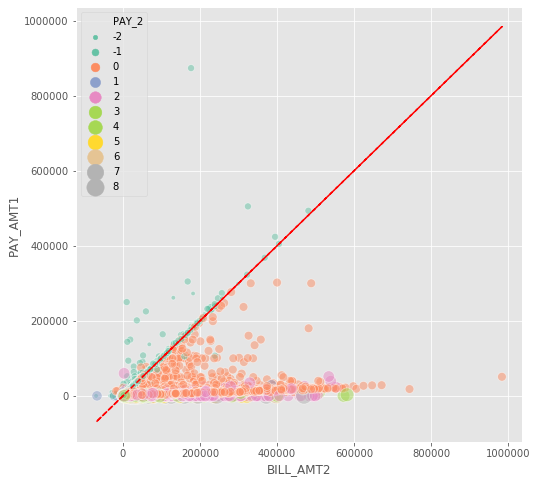

In [24]:
plt.rc('figure', figsize=(8, 8))
pl_pay0 = sns.scatterplot(x="BILL_AMT2", y="PAY_AMT1",hue="PAY_2", size="PAY_2",sizes=(20, 300), palette="Set2",legend="full", alpha=0.5,data=odata_s)
plt.plot(odata_s.BILL_AMT2, odata_s.BILL_AMT2, '--r')

We can see that most of the cases are plotted correctly according to tha variable `PAY_1`. Additionally, there are cases where the `BILL_AMT2` is negative, therefore it's a credit or it's an error. This same observations is shown in the following plots. 

Now let's be suspicuious about this, and think that the variables are defined one by one, I mean that the variables `BILL_AMT1`is related to `PAY_AMT1`and `PAY_0`. The plot is the following:



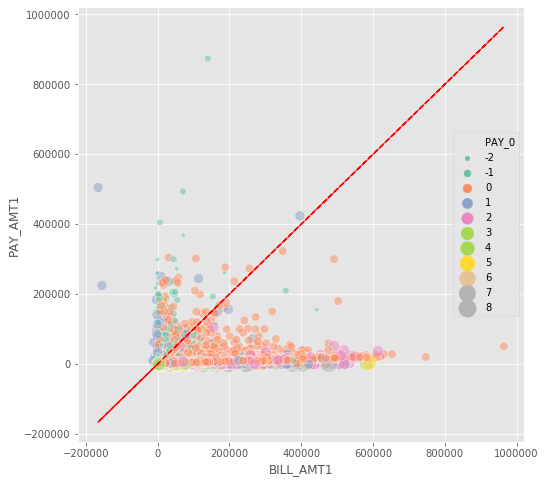

In [25]:
plt.rc('figure', figsize=(8, 8))
pl_pay0 = sns.scatterplot(x="BILL_AMT1", y="PAY_AMT1",hue="PAY_0", size="PAY_0",sizes=(20, 300), palette="Set2",legend="full", alpha=0.5,data=odata_s)
plt.plot(odata_s.BILL_AMT1, odata_s.BILL_AMT1, '--r')

Nos we can see that the effect is worst here, because there are more observations labelled incorrectly. So, in that case we will assume that the correct logic is the one of the first plot.

Let's plot the rest of them:

Related to other `PAY` variables:

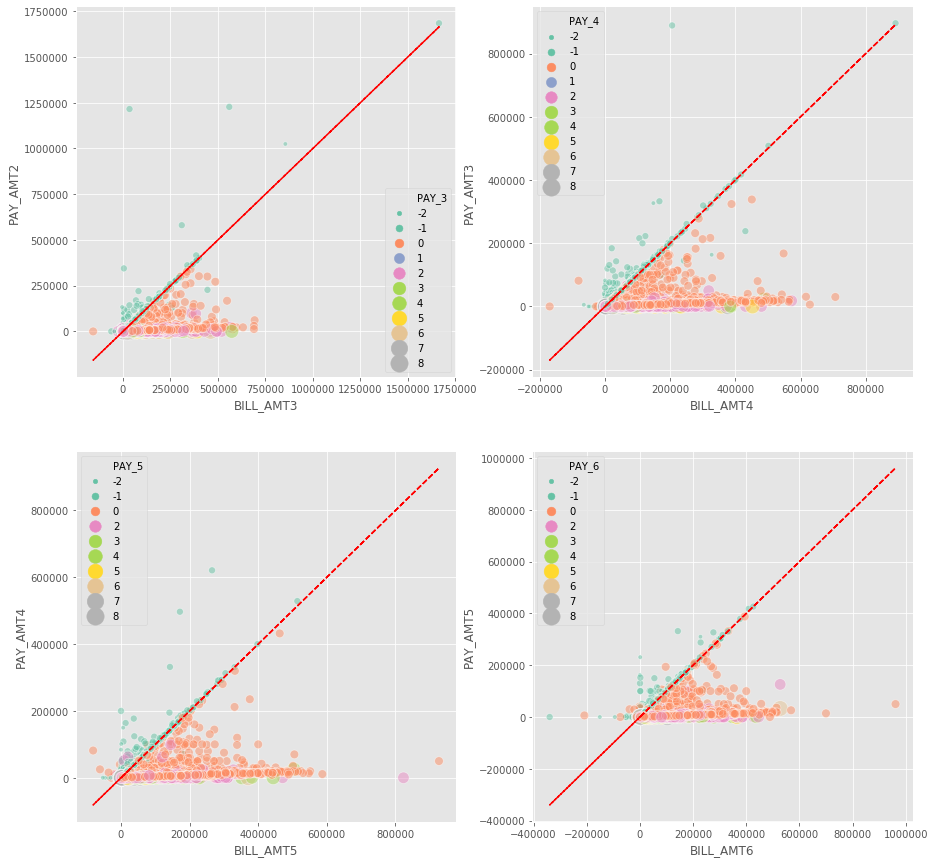

In [26]:
plt.rc('figure', figsize=(15, 15))
plt.subplot(2,2,1)
pl_pay2 = sns.scatterplot(x="BILL_AMT3", y="PAY_AMT2",hue="PAY_3", size="PAY_3",sizes=(20, 300), palette="Set2",legend="full", alpha=0.5,data=odata_s)
plt.plot(odata_s.BILL_AMT3, odata_s.BILL_AMT3, '--r')
plt.subplot(2,2,2)
pl_pay3 = sns.scatterplot(x="BILL_AMT4", y="PAY_AMT3",hue="PAY_4", size="PAY_4",sizes=(20, 300), palette="Set2",legend="full", alpha=0.5,data=odata_s)
plt.plot(odata_s.BILL_AMT4, odata_s.BILL_AMT4, '--r')
plt.subplot(2,2,3)
pl_pay4 = sns.scatterplot(x="BILL_AMT5", y="PAY_AMT4",hue="PAY_5", size="PAY_5",sizes=(20, 300), palette="Set2",legend="full", alpha=0.5,data=odata_s)
plt.plot(odata_s.BILL_AMT5, odata_s.BILL_AMT5, '--r')
plt.subplot(2,2,4)
pl_pay5 = sns.scatterplot(x="BILL_AMT6", y="PAY_AMT5",hue="PAY_6", size="PAY_6",sizes=(20, 300), palette="Set2",legend="full", alpha=0.5,data=odata_s)
plt.plot(odata_s.BILL_AMT6, odata_s.BILL_AMT6, '--r')

As the first plot, we can see the same structure here. 

Due the lag, we can't use the variable `PAY_AMT6`.

Considering the previous analysis, we can say:

* Considering that the information of the variables `PAY` are a transformation of information of other variables, we should eliminate the variables `PAY_AMT` and `BILL_AMT`. 
* Because of the lag, it's not possible to reproduce all `PAY` variables, but these have more relevant information than `PAY_AMT` and `BILL_AMT` variables. 

Before doing that, let's plot the rest of the plots defined by the variables without the lag, just to be sure about the effects.

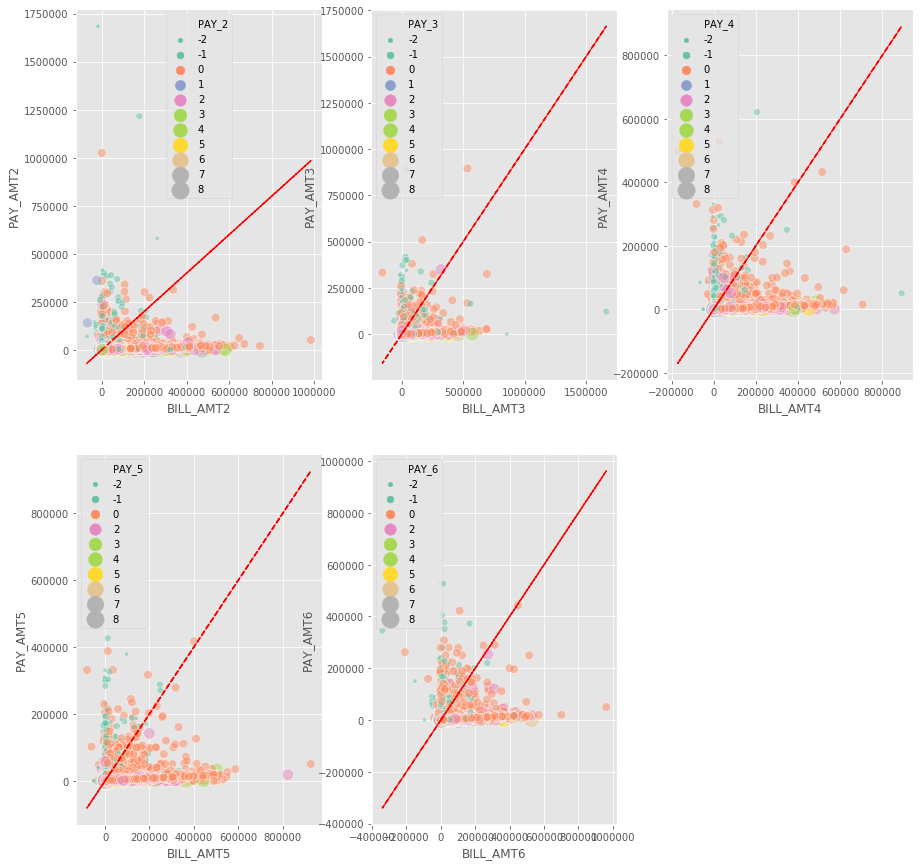

In [27]:
plt.rc('figure', figsize=(15, 15))
plt.subplot(2,3,1)
sns.scatterplot(x="BILL_AMT2", y="PAY_AMT2",hue="PAY_2", size="PAY_2",sizes=(20, 300), palette="Set2",legend="full", alpha=0.5,data=odata_s)
plt.plot(odata_s.BILL_AMT2, odata_s.BILL_AMT2, '--r')
plt.subplot(2,3,2)
sns.scatterplot(x="BILL_AMT3", y="PAY_AMT3",hue="PAY_3", size="PAY_3",sizes=(20, 300), palette="Set2",legend="full", alpha=0.5,data=odata_s)
plt.plot(odata_s.BILL_AMT3, odata_s.BILL_AMT3, '--r')
plt.subplot(2,3,3)
sns.scatterplot(x="BILL_AMT4", y="PAY_AMT4",hue="PAY_4", size="PAY_4",sizes=(20, 300), palette="Set2",legend="full", alpha=0.5,data=odata_s)
plt.plot(odata_s.BILL_AMT4, odata_s.BILL_AMT4, '--r')
plt.subplot(2,3,4)
sns.scatterplot(x="BILL_AMT5", y="PAY_AMT5",hue="PAY_5", size="PAY_5",sizes=(20, 300), palette="Set2",legend="full", alpha=0.5,data=odata_s)
plt.plot(odata_s.BILL_AMT5, odata_s.BILL_AMT5, '--r')
plt.subplot(2,3,5)
sns.scatterplot(x="BILL_AMT6", y="PAY_AMT6",hue="PAY_6", size="PAY_6",sizes=(20, 300), palette="Set2",legend="full", alpha=0.5,data=odata_s)
plt.plot(odata_s.BILL_AMT6, odata_s.BILL_AMT6, '--r')

We have the same effect, therefore...

In [28]:
# Dropping the variables
odata = odata.drop(['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'], axis=1)

In [29]:
odata.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,1
1,120000,2,2,2,26,-1,2,0,0,0,2,1
2,90000,2,2,2,34,0,0,0,0,0,0,0
3,50000,2,2,1,37,0,0,0,0,0,0,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,0


In [30]:
ldata = odata.copy()

## 5. Data Transformation

We will do a few transformations. Mainly to create categorical variables and create another two variables which is the sum of the different `PAY` variables. The logic is the lower this number is, the better chances is not no be on default. 

Before doing any transformation, let's notice the meaning of the different `PAY` variables:

* __-2:__ No Consumption
* __-1:__ Pay duly
* __0:__ The use of revolving credit
* __N:__ Payment delay for N months (N=1,2,...,8)
* __9:__ Payment delay for 9 months and above

Therefore, more than categorical, `PAY` variables is like a scale. Basically because these numbers could reflect the risk that the bank could take. A client with no consumption means that the bank has no risk, a client with consumption buy paying duly has risk, but very low, and the same logic with the rest of the number above. Consequently, the lower the number, better for the bank considering risk.


#### 5.1. Change "Sex", "Education", "Marriage", and "Default" variables into categorical type. 

In order to check that the transformation is working, we will cretae other variables. Once we check that the trasnformation is right, we will drop the original variables 

In [31]:
odata['SEX_C'] = odata['SEX'].apply(lambda x: 'Male' if x == 1 else 'Female')
odata['SEX_C'] = pd.Categorical(odata.SEX_C,categories=["Male","Female"])
odata['EDUCATION_C'] = odata['EDUCATION'].apply(lambda x: 'Graduate' if x == 1 else ('University' if x==2 else ('High School' if x==3 else "Others")))
odata['EDUCATION_C'] = pd.Categorical(odata.EDUCATION_C,categories=["Graduate","University","High School","Others"])
odata['MARRIAGE_C'] = odata['MARRIAGE'].apply(lambda x: 'Married' if x == 1 else ('Single' if x==2 else "Others"))
odata['MARRIAGE_C'] = pd.Categorical(odata.MARRIAGE_C,categories=["Married","Single","Others"])
odata['DEFAULT_C'] = odata['DEFAULT'].apply(lambda x: 'Default' if x == 1 else 'No Default')
odata['DEFAULT_C'] = pd.Categorical(odata.DEFAULT_C,categories=["Default","No Default"])
odata.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,DEFAULT,SEX_C,EDUCATION_C,MARRIAGE_C,DEFAULT_C
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,1,Female,University,Married,Default
1,120000,2,2,2,26,-1,2,0,0,0,2,1,Female,University,Single,Default
2,90000,2,2,2,34,0,0,0,0,0,0,0,Female,University,Single,No Default
3,50000,2,2,1,37,0,0,0,0,0,0,0,Female,University,Married,No Default
4,50000,1,2,1,57,-1,0,-1,0,0,0,0,Male,University,Married,No Default


The transformation is working properly, therefore we will drop the original variables 

In [32]:
# Dropping the variables
odata = odata.drop(['SEX','EDUCATION','MARRIAGE','DEFAULT'], axis=1)
odata.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,SEX_C,EDUCATION_C,MARRIAGE_C,DEFAULT_C
0,20000,24,2,2,-1,-1,-2,-2,Female,University,Married,Default
1,120000,26,-1,2,0,0,0,2,Female,University,Single,Default
2,90000,34,0,0,0,0,0,0,Female,University,Single,No Default
3,50000,37,0,0,0,0,0,0,Female,University,Married,No Default
4,50000,57,-1,0,-1,0,0,0,Male,University,Married,No Default


The last transformation is to create categories for the Age according to statistics Canada: https://www.statcan.gc.ca/eng/concepts/definitions/age2

The idea is no be able to analize better the relation between the variables. The categories are:

1. __Youth:__ 15-24 years
2. __Adults:__ 25-64 years
3. __Senior:__ Over 65 years

In [33]:
# Creating the categories
age_cat = pd.cut(odata.AGE, [14, 24, 64,100], include_lowest=False)
odata['AGE_C'] = age_cat
odata['AGE_C'] = pd.Categorical(odata.AGE_C)
odata.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,SEX_C,EDUCATION_C,MARRIAGE_C,DEFAULT_C,AGE_C
0,20000,24,2,2,-1,-1,-2,-2,Female,University,Married,Default,"(14, 24]"
1,120000,26,-1,2,0,0,0,2,Female,University,Single,Default,"(24, 64]"
2,90000,34,0,0,0,0,0,0,Female,University,Single,No Default,"(24, 64]"
3,50000,37,0,0,0,0,0,0,Female,University,Married,No Default,"(24, 64]"
4,50000,57,-1,0,-1,0,0,0,Male,University,Married,No Default,"(24, 64]"


Now let's drop the original variables

In [34]:
# Dropping the variable
odata = odata.drop(['AGE'], axis=1)
odata.head()

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,SEX_C,EDUCATION_C,MARRIAGE_C,DEFAULT_C,AGE_C
0,20000,2,2,-1,-1,-2,-2,Female,University,Married,Default,"(14, 24]"
1,120000,-1,2,0,0,0,2,Female,University,Single,Default,"(24, 64]"
2,90000,0,0,0,0,0,0,Female,University,Single,No Default,"(24, 64]"
3,50000,0,0,0,0,0,0,Female,University,Married,No Default,"(24, 64]"
4,50000,-1,0,-1,0,0,0,Male,University,Married,No Default,"(24, 64]"


#### 5.2. Create a new variables which is the sum of the `PAY` variables

The logic is the lower this number is, the better chances is not no be on default.

In [35]:
# Creating new variable
odata['PAY_SUM'] = odata.PAY_0 + odata.PAY_2 + odata.PAY_3 + odata.PAY_4 + odata.PAY_5 + odata.PAY_6
odata.head()

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,SEX_C,EDUCATION_C,MARRIAGE_C,DEFAULT_C,AGE_C,PAY_SUM
0,20000,2,2,-1,-1,-2,-2,Female,University,Married,Default,"(14, 24]",-2
1,120000,-1,2,0,0,0,2,Female,University,Single,Default,"(24, 64]",3
2,90000,0,0,0,0,0,0,Female,University,Single,No Default,"(24, 64]",0
3,50000,0,0,0,0,0,0,Female,University,Married,No Default,"(24, 64]",0
4,50000,-1,0,-1,0,0,0,Male,University,Married,No Default,"(24, 64]",-2


Now we are ready to analyze the data

## 6. Data Analysis

#### 6.1. Relation between `DEFAULT_C`and `LIMIT_BAL` and `PAY_SUM`. 


First, let's count again the proportion of defaults:

In [36]:
odata.groupby(['DEFAULT_C']).size()/len(odata.DEFAULT_C)*100

DEFAULT_C
Default       22.313435
No Default    77.686565
dtype: float64

After the data cleaning, the proportion is practically the same.

Nos the plotting:

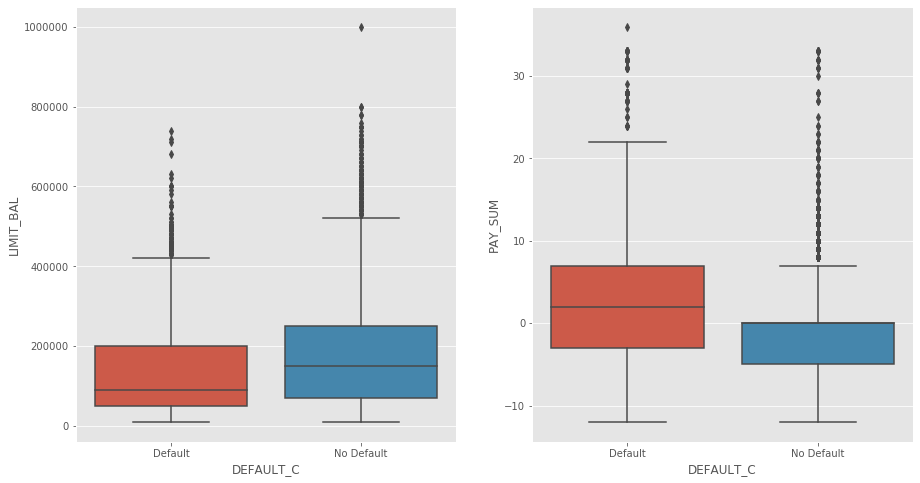

In [37]:
plt.rc('figure', figsize=(15, 8))
plt.subplot(1,2,1)
sns.boxplot(x="DEFAULT_C", y="LIMIT_BAL",data=odata)
plt.subplot(1,2,2)
sns.boxplot(x="DEFAULT_C", y="PAY_SUM",data=odata)

Looking the plots above, it's easy to see that the new variable, `PAY_SUM` could explain better the default than the `LIMIT_BAL`

Now let's plot all the `PAY` variables:

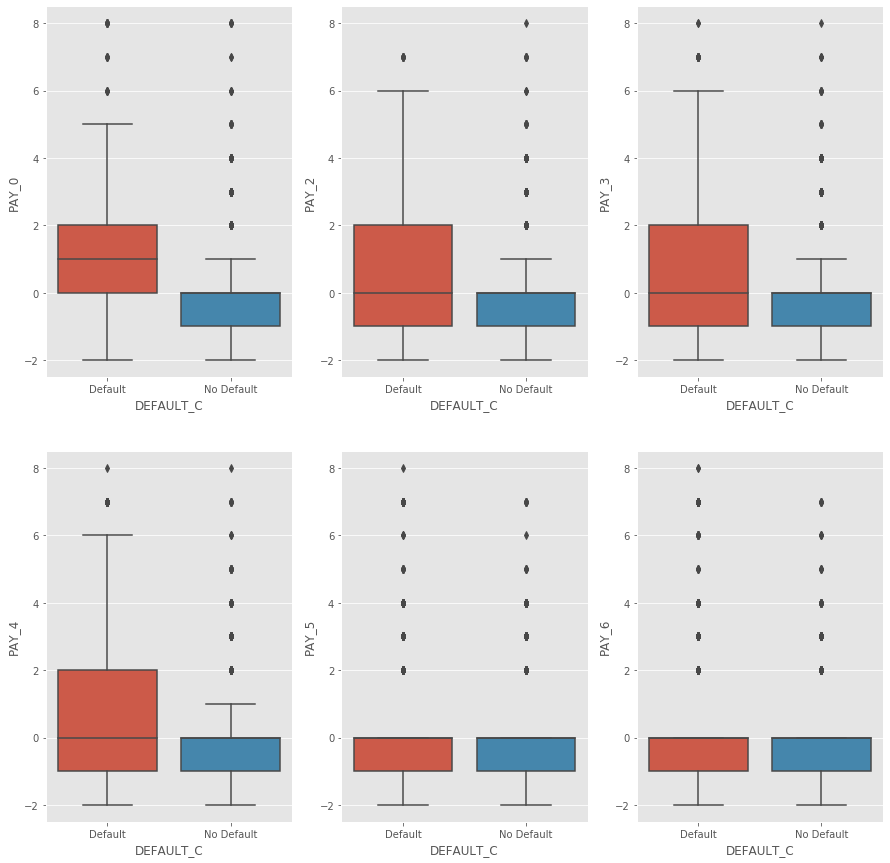

In [38]:
plt.rc('figure', figsize=(15, 15))
plt.subplot(2,3,1)
sns.boxplot(x="DEFAULT_C", y="PAY_0",data=odata)
plt.subplot(2,3,2)
sns.boxplot(x="DEFAULT_C", y="PAY_2",data=odata)
plt.subplot(2,3,3)
sns.boxplot(x="DEFAULT_C", y="PAY_3",data=odata)
plt.subplot(2,3,4)
sns.boxplot(x="DEFAULT_C", y="PAY_4",data=odata)
plt.subplot(2,3,5)
sns.boxplot(x="DEFAULT_C", y="PAY_5",data=odata)
plt.subplot(2,3,6)
sns.boxplot(x="DEFAULT_C", y="PAY_6",data=odata)

It's difficult to see a clear trend. But we can somewhat infer:

* In general the "No Defaults" by month are with number below 0, which is correct
* There are months when the number are represented as pay in time, but they are labelled as default. That's because in one month you can't see the whole behaviour on an individual
* The overall, `PAY_SUM`, could be enough to represent the default variable, but if needed we can use every individual element of `PAY`

#### 6.2. Relation between `DEFAULT_C` and `AGE_C`.

In [39]:
odata.groupby(['AGE_C','DEFAULT_C']).size().unstack()/len(odata.DEFAULT_C)*100

DEFAULT_C,Default,No Default
AGE_C,,
"(14, 24]",2.455998,6.499780
"(24, 64]",19.762846,70.916523
"(64, 100]",0.094591,0.270261


Most of the cases occur when the persons are adults, $\approx 90$%, and the proportion of defaults it's almost the same as the whole dataset, therefore this age group could represent the dataset.

#### 6.3. Relation between `DEFAULT_C` and `SEX_C`.

In [40]:
odata.groupby(['SEX_C','DEFAULT_C']).size().unstack()/len(odata.DEFAULT_C)*100

DEFAULT_C,Default,No Default
SEX_C,,
Male,9.665214,30.015878
Female,12.648221,47.670687


We can see that there are more females than males ($60$% vs $40$%). Additionally, the males have a default tendency higher than females. Therefore, this variable could be good for the logistic regression. 

#### 6.4. Relation between `DEFAULT_C` and `EDUCATION_C`.

In [41]:
odata.groupby(['EDUCATION_C','DEFAULT_C']).size().unstack()/len(odata.DEFAULT_C)*100

DEFAULT_C,Default,No Default
EDUCATION_C,,
Graduate,6.878146,28.867268
University,11.246242,36.130536
High School,4.165400,12.296882
Others,0.023648,0.391879


It's not uncommon to think that the highest proportion of Default comes with lower education. Therefore, this also could be a good explanatory variable

#### 6.5. Relation between `DEFAULT_C` and `MARRIAGE_C`.

In [42]:
odata.groupby(['MARRIAGE_C','DEFAULT_C']).size().unstack()/len(odata.DEFAULT_C)*100

DEFAULT_C,Default,No Default
MARRIAGE_C,,
Married,10.783419,34.745448
Single,11.246242,42.150603
Others,0.283774,0.790514


Highest proportion comes to single persons.

#### 6.6. Relation between `DEFAULT_C` with `SEX_C` and `AGE_C`.

In [43]:
odata.groupby(['SEX_C','AGE_C','DEFAULT_C']).size().unstack()/len(odata.DEFAULT_C)*100

DEFAULT_C           Default  No Default
SEX_C  AGE_C                           
Male   (14, 24]    0.783757    1.797237
       (24, 64]    8.824026   28.080132
       (64, 100]   0.057430    0.138509
Female (14, 24]    1.672241    4.702544
       (24, 64]   10.938820   42.836391
       (64, 100]   0.037161    0.131752

Here we can also see that the proportion of default of adult males is bigger than females. 

Additionally, youth females have higher proportion than youth males.

#### 6.7. Relation between `DEFAULT_C` with `EDUCATION_C` and `MARRIAGE_C`.

In [44]:
odata.groupby(['EDUCATION_C','MARRIAGE_C','DEFAULT_C']).size().unstack()/len(odata.DEFAULT_C)*100

DEFAULT_C                Default  No Default
EDUCATION_C MARRIAGE_C                      
Graduate    Married     2.597885    9.976014
            Single      4.236343   18.766258
            Others      0.043917    0.124996
University  Married     5.628188   17.485896
            Single      5.469410   18.246005
            Others      0.148644    0.398635
High School Married     2.547211    7.118003
            Single      1.526975    4.922131
            Others      0.091213    0.256748
Others      Married     0.010135    0.165535
            Single      0.013513    0.216209
            Others           NaN    0.010135

Most of the married couples hold a University degree, and the single persons in this group are almost the same quantity ($\approx 23$%). University singles have more tendency to default than graduate single ones.

In the married couples, the the University ones have more tendency to default than graduate ones.

#### 6.8. Relation between `LIMIT_BAL` and `PAY_SUM`.

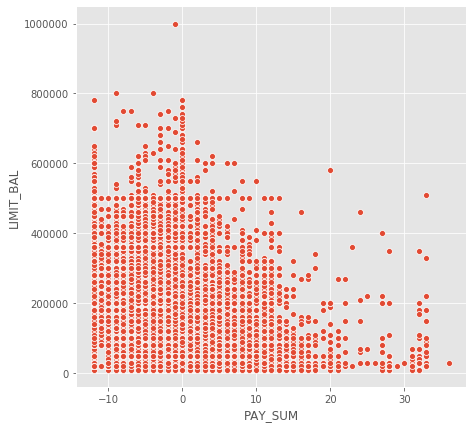

In [45]:
plt.rc('figure', figsize=(7, 7))
sns.scatterplot(x="PAY_SUM",y="LIMIT_BAL", data=odata)

It's interesting to see that highest `LIMIT_BAL` not always have lowest `PAY_SUM`, which means a huge risk for the bank (look the point on the far right with a `PAY_SUM` over 30 and `LIMIT_BAL` over 500000). 

We can also see that there are scenarios with lowest `LIMIT_BAL` and very low default scenarios (low `PAY_SUM`). In this scenarios there is a potential opportunity to offer to the clients to upgrade the `LIMIT_BAL` according to their good payments behavior.

We can see the relation between `LIMIT_BAL `with every `PAY` variable using a correlation matrix.

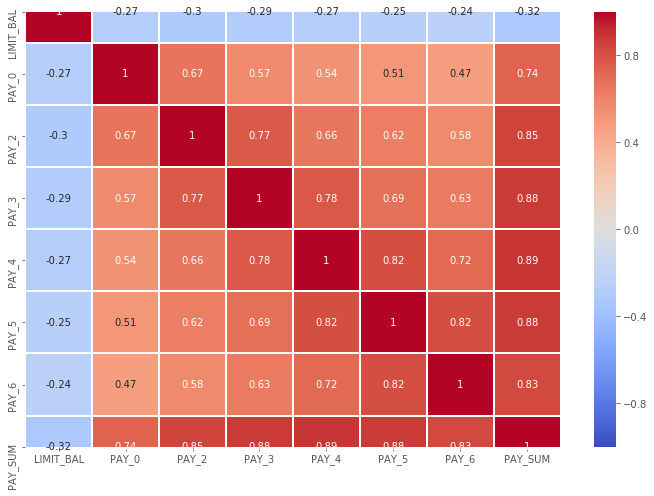

In [46]:
# Copy dataset 
odata_p =odata.copy()
# Subset according
odata_p = odata_p.loc[:, ["LIMIT_BAL","PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","PAY_SUM"]]
plt.figure(figsize=(12, 8))
sns.heatmap(odata_p.corr().round(4), annot=True,linewidths=1.0,vmin=-1,vmax=1,cmap="coolwarm")

It's interesting to see that each individual `PAY` category has a higher correlation with its adyacent neighbor. In other words, the highest correlation of `PAY_0` is with `PAY_1`, `PAY_2` is with `PAY_3`, etc. So, your payment behaviour has a trend between the months, if you pay on time one month it's likely that you will pay on time the next month. The same case when you are not paying on time.

Another thing that we have to notice is that `PAY_SUM` has a higher correlation to `LIMIT_BAL` than any other individual payment categories.

#### 6.9. Relation between `LIMIT_BAL` and `PAY_SUM` with `AGE_C`.

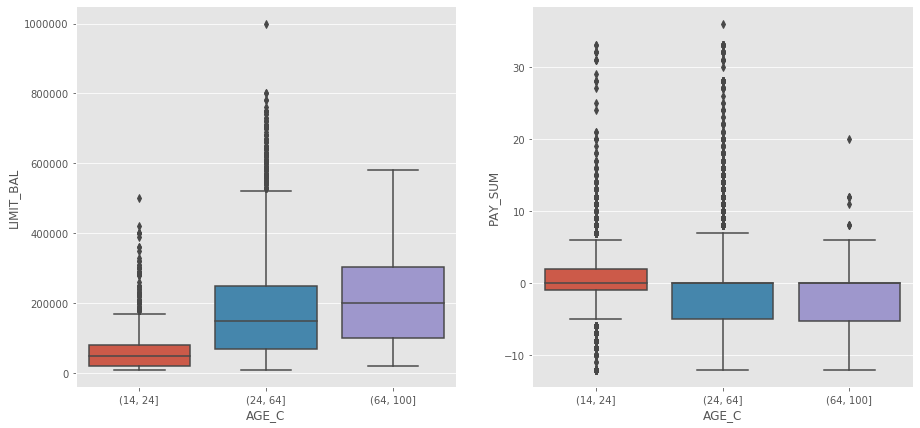

In [47]:
plt.rc('figure', figsize=(15, 7))
plt.subplot(1,2,1)
sns.boxplot(x="AGE_C",y="LIMIT_BAL", data=odata)
plt.subplot(1,2,2)
sns.boxplot(x="AGE_C",y="PAY_SUM", data=odata)

From the boxplot we can see that with more age is more likely to have a higher `LIMIT_BAL`. This makes sense, because usually with age people become more responsible financially.

Additionally, younger people has more chances to default, which is related to `PAY_SUM`.

#### 6.10. Relation between `LIMIT_BAL` and `PAY_SUM` with `SEX_C`.

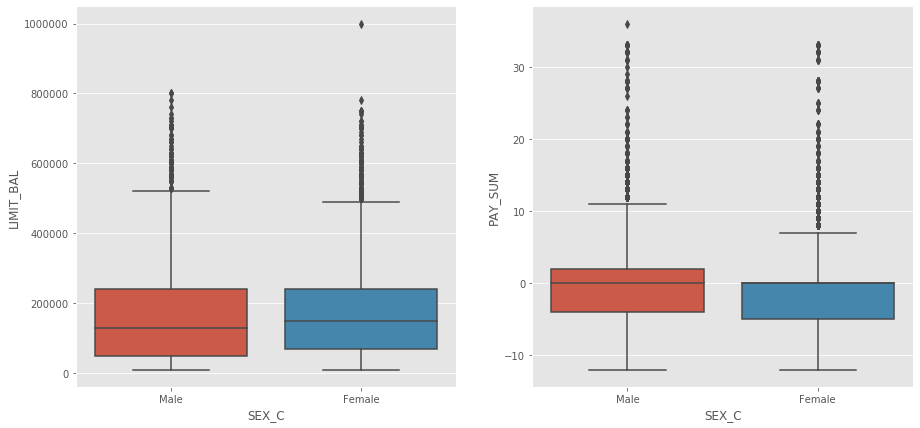

In [48]:
plt.rc('figure', figsize=(15, 7))
plt.subplot(1,2,1)
sns.boxplot(x="SEX_C",y="LIMIT_BAL", data=odata)
plt.subplot(1,2,2)
sns.boxplot(x="SEX_C",y="PAY_SUM", data=odata)

In this case is not possible to distingish between male and female with the `LIMIT_BAL`.

As previous analysis, males have a higher tendency to default than females.

#### 6.11. Relation between `LIMIT_BAL` and `PAY_SUM` with `EDUCATION_C`.

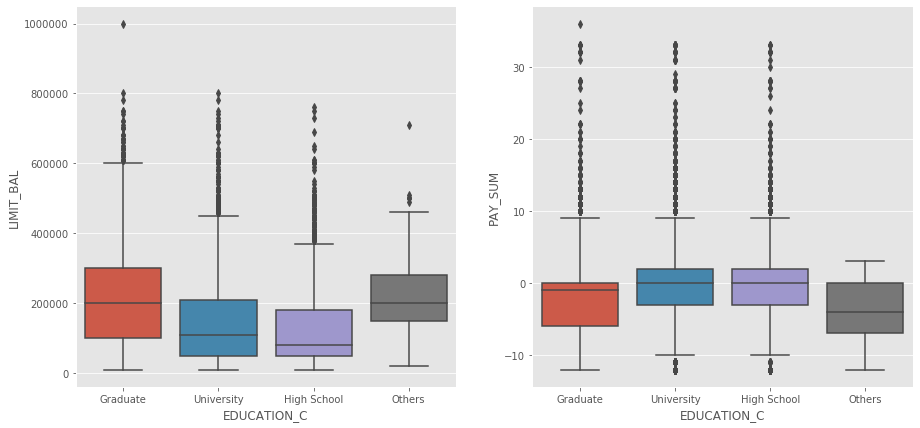

In [49]:
plt.rc('figure', figsize=(15, 7))
plt.subplot(1,2,1)
sns.boxplot(x="EDUCATION_C",y="LIMIT_BAL", data=odata)
plt.subplot(1,2,2)
sns.boxplot(x="EDUCATION_C",y="PAY_SUM", data=odata)

Higher education means higher `LIMIT_BAL`.

On the other side, University and High School people have a higher tendency to default.

# III. Classification Analysis

For this section, we will use the following dataset:

In [50]:
ldata['PAY_SUM'] = ldata.PAY_0 + ldata.PAY_2 + ldata.PAY_3 + ldata.PAY_4 + ldata.PAY_5 + ldata.PAY_6
ldata.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,DEFAULT,PAY_SUM
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,1,-2
1,120000,2,2,2,26,-1,2,0,0,0,2,1,3
2,90000,2,2,2,34,0,0,0,0,0,0,0,0
3,50000,2,2,1,37,0,0,0,0,0,0,0,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,0,-2


## 1. Logistic Regression

## START Analysis by Priyanka

## Applied sklearn + Train Test Split + Logit function

In [51]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from statsmodels.discrete.discrete_model import Logit
from scipy.special import logit

In [52]:
ldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29601 entries, 0 to 29999
Data columns (total 13 columns):
LIMIT_BAL    29601 non-null int64
SEX          29601 non-null int64
EDUCATION    29601 non-null int64
MARRIAGE     29601 non-null int64
AGE          29601 non-null int64
PAY_0        29601 non-null int64
PAY_2        29601 non-null int64
PAY_3        29601 non-null int64
PAY_4        29601 non-null int64
PAY_5        29601 non-null int64
PAY_6        29601 non-null int64
DEFAULT      29601 non-null int64
PAY_SUM      29601 non-null int64
dtypes: int64(13)
memory usage: 3.2 MB


## Using single variable PAY_SUM as a predictor

In [53]:
# Features or Predictors - X
X = ldata['PAY_SUM'].values.reshape(-1, 1)
# Target - Y
Y = ldata['DEFAULT'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

# Fit Logistic Regression Model
ldata_log_reg = LogisticRegression(solver='lbfgs', max_iter=500, random_state=0)
ldata_log_reg.fit(X_train, Y_train)

# Determine Accuracy
predictions = ldata_log_reg.predict(X_test)
accuracy_score(Y_test,predictions)

0.7988965206620876

In [54]:
# Fit Logit Model

m = Logit(Y_train,X_train)
m = m.fit()

print(m.summary2())

Optimization terminated successfully.
         Current function value: 0.635236
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: -0.190    
Dependent Variable: y                AIC:              26326.1876
Date:               2019-07-14 23:44 BIC:              26334.1265
No. Observations:   20720            Log-Likelihood:   -13162.   
Df Model:           0                LL-Null:          -11060.   
Df Residuals:       20719            LLR p-value:      nan       
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
--------------------------------------------------------------------
         Coef.     Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
x1       0.1288      0.0029    43.9143    0.0000    0.1230    0.1345



In [55]:
ldata.loc[:, 'p'] = m.predict(X)

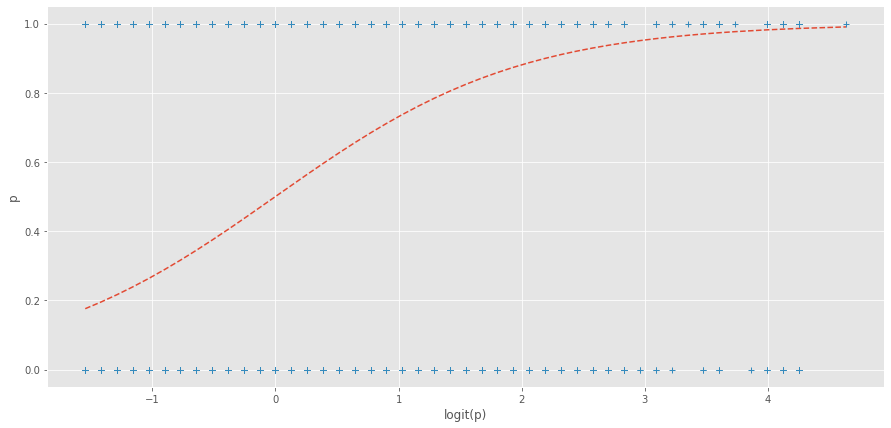

In [56]:
ldata = ldata.sort_values(by = ['p'], axis = 0)
plt.plot(logit(ldata.p), ldata.p, '--')
plt.plot(logit(ldata.p), ldata.DEFAULT, '+')
plt.xlabel('logit(p)')
plt.ylabel('p')
plt.show()

## Using all PAY_ variables as predictors (MULTIPLE)

In [57]:
# Features or Predictors - X
X = ldata[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5']].values
# Target - Y
Y = ldata['DEFAULT'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

# Fit Logistic Regression Model
ldata_log_reg = LogisticRegression(solver='lbfgs', max_iter=500, random_state=0)
ldata_log_reg.fit(X_train, Y_train)

# Determine Accuracy
predictions = ldata_log_reg.predict(X_test)
accuracy_score(Y_test,predictions)

0.8030627181623691

In [58]:
# Fit Logit model
m = Logit(Y_train,X_train)
m = m.fit()

Optimization terminated successfully.
         Current function value: 0.631423
         Iterations 5


In [59]:
ldata.loc[:, 'p'] = m.predict(X)

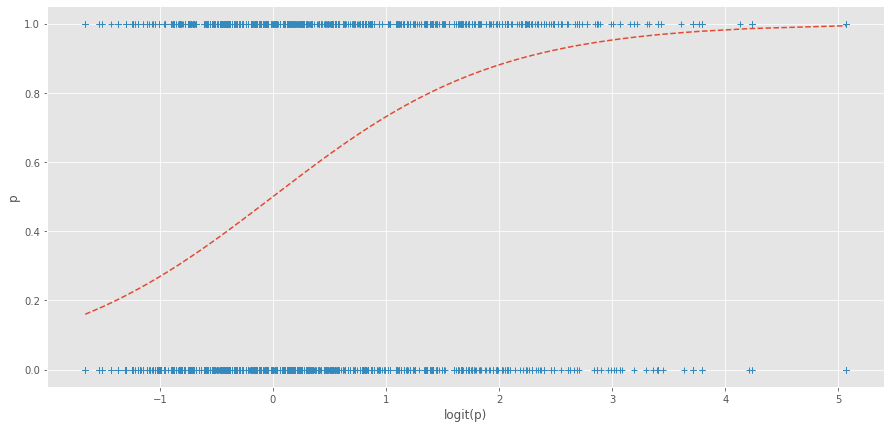

In [60]:
ldata = ldata.sort_values(by = ['p'], axis = 0)
plt.plot(logit(ldata.p), ldata.p, '--')
plt.plot(logit(ldata.p), ldata.DEFAULT, '+')
plt.xlabel('logit(p)')
plt.ylabel('p')
plt.show()

## Using single variable LIMT_BAL as a predictor

In [61]:
# Features or Predictors - X
X = ldata['LIMIT_BAL'].values.reshape(-1, 1)
# Target - Y
Y = ldata['DEFAULT'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

# Fit Logistic Regression Model
ldata_log_reg = LogisticRegression(solver='lbfgs', max_iter=500, random_state=0)
ldata_log_reg.fit(X_train, Y_train)

# Determine Accuracy
predictions = ldata_log_reg.predict(X_test)
accuracy_score(Y_test,predictions)

0.7752505348496791

In [62]:
# Fit Logit model

m = Logit(Y_train,X_train)
m = m.fit()

Optimization terminated successfully.
         Current function value: 0.538156
         Iterations 4


In [63]:
ldata.loc[:, 'p'] = m.predict(X)

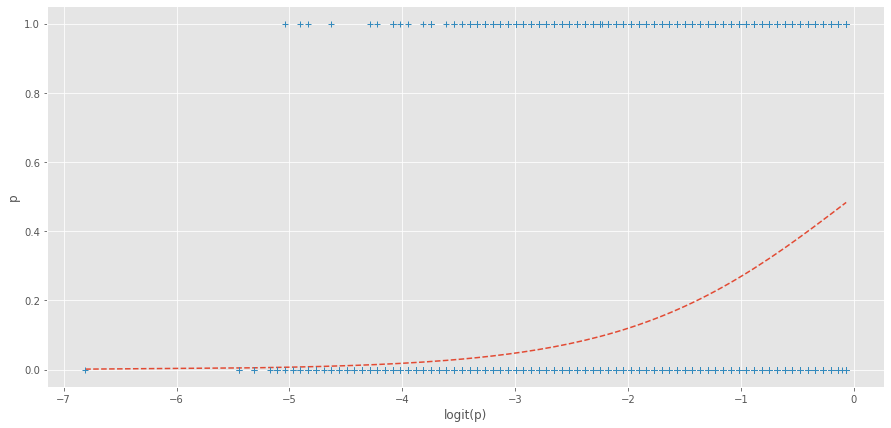

In [64]:
ldata = ldata.sort_values(by = ['p'], axis = 0)
plt.plot(logit(ldata.p), ldata.p, '--')
plt.plot(logit(ldata.p), ldata.DEFAULT, '+')
plt.xlabel('logit(p)')
plt.ylabel('p')
plt.show()

## Using other ORDINAL variables as predictors (MULTIPLE)

In [65]:
# Features or Predictors - X
X = ldata[['SEX','EDUCATION','MARRIAGE','AGE']].values
# Target - Y
Y = ldata['DEFAULT'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

# Fit Logistic Regression Model
ldata_log_reg = LogisticRegression(solver='lbfgs', max_iter=500, random_state=0)
ldata_log_reg.fit(X_train, Y_train)

# Determine Accuracy
predictions = ldata_log_reg.predict(X_test)
accuracy_score(Y_test,predictions)

0.7784033329580002

In [66]:
# Fit Logit model

m = Logit(Y_train,X_train)
m = m.fit()

Optimization terminated successfully.
         Current function value: 0.530230
         Iterations 5


In [67]:
ldata.loc[:, 'p'] = m.predict(X)

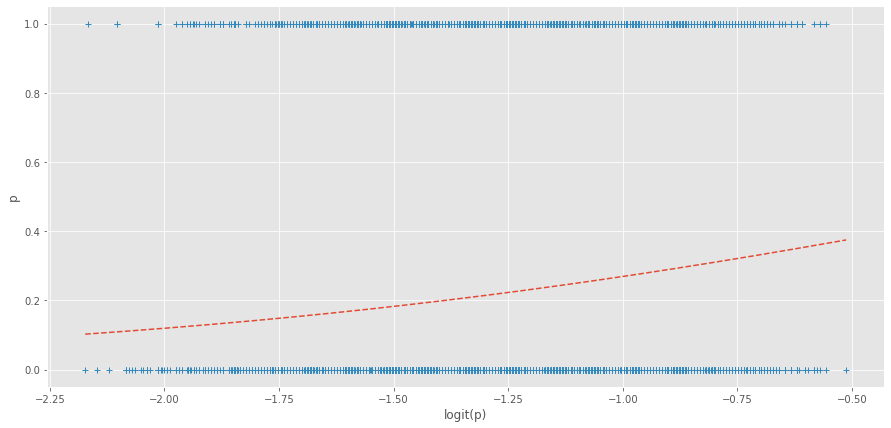

In [68]:
ldata = ldata.sort_values(by = ['p'], axis = 0)
plt.plot(logit(ldata.p), ldata.p, '--')
plt.plot(logit(ldata.p), ldata.DEFAULT, '+')
plt.xlabel('logit(p)')
plt.ylabel('p')
plt.show()

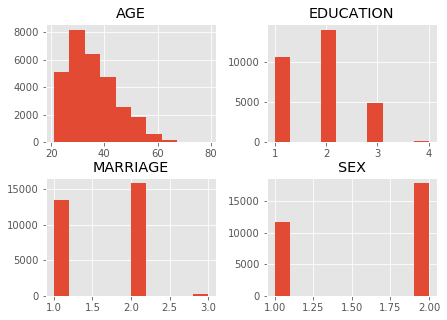

In [69]:
# Plot the histogram
ldata[['SEX','EDUCATION','MARRIAGE','AGE']].hist(figsize=(7,5))
plt.show()

##  Adding Dummy variables corresponding to Dummy Variables - ????

    Example - Marriage

In [70]:
ldata['MARRIAGE'].value_counts()

2    15806
1    13477
3      318
Name: MARRIAGE, dtype: int64

In [71]:
dummy_var = pd.get_dummies(ldata['MARRIAGE'], prefix='marriage')
# dummy_vardata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAb8AAAEyCAYAAABqPd50AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvOIA7rQAAIABJREFUeJzt3HtsVGdi9/HveAZI7AFnLjGsWaLYYLa1G6+dDMK4G3CcaauG3S0vQUjbJFW4bDbrBES8GwVIla66hbhdjC0vtlgFy7sqK9EKYTbq241WltewxaIaY4/LpQEcojQIg2MfBzyYxJc57x+8meLYxMbXOZzf56/MM88Z/55HR/rlnBmOwzRNExERERtJmOkAIiIi003lJyIitqPyExER21H5iYiI7aj8RETEdlR+IiJiOyo/ERGxHZWfiIjYjspPRERsR+UnIiK245rpABNx5cqVCR3v9/vp7OycpDTTw2qZrZYXrJdZeaee1TJbLS9MTubU1NQxz9WVn4iI2I7KT0REbEflJyIitqPyExER2xn1By9VVVU0NzeTnJxMaWlpbPy3v/0t7733Hk6nk8cff5znn38egNraWurr60lISGDDhg3k5OQAEA6HqampIRqN8vTTT7NmzRoAOjo6KC8vJxKJkJaWxpYtW3C5LP07HBERiXOjXvkVFBSwc+fOIWNnzpyhqamJPXv2sHfvXr7zne8AcPnyZRobG9m7dy9vvvkm1dXVRKNRotEo1dXV7Ny5k7KyMk6cOMHly5cBOHjwIKtXr6aiooKkpCTq6+unYJkiIiL/a9Tyy8zMxO12Dxn73e9+x1/91V8xa9YsAJKTkwEIhULk5+cza9YsUlJSWLBgAW1tbbS1tbFgwQLmz5+Py+UiPz+fUCiEaZqcPXuWvLw84HbRhkKhyV6jiIjIEOO6v9je3s7777/PoUOHmDVrFi+88AJLlizBMAwyMjJi87xeL4ZhAODz+WLjPp+Pixcv0tPTQ2JiIk6nc9h8ERGRqTKu8otGo0QiEXbt2sUHH3xAWVkZ+/btwzTNEeePNO5wOO7579bV1VFXVwdASUkJfr//nj/jTi6Xa8KfMd2sltlqecF6mZV36lkts9XywvRnHlf5eb1eli9fjsPhYMmSJSQkJNDT04PP56Orqys2zzAMvF4vwJDxrq4uPB4Pc+fOpbe3l8HBQZxO55D5IwkGgwSDwdjriT4NwK5PQZhOVssL1susvFPPapmtlhcs8oSXZcuWcebMGeD2I8YGBgaYO3cugUCAxsZG+vv76ejooL29nSVLlrB48WLa29vp6OhgYGCAxsZGAoEADoeDrKwsTp48CUBDQwOBQGA8kURERMZs1Cu/8vJyzp07R09PDy+//DLr16+nsLCQqqoqfvSjH+FyuXjllVdwOBwsWrSIFStWUFxcTEJCAps2bSIh4Xa/bty4kV27dhGNRnnqqadYtGgRAM899xzl5eUcOnSItLQ0CgsLp3bFIveZa/8nf6YjDOF8592ZjiAyKod5ty/qLEAPto5/VssL1ss8+P3vznSEIUYrP6vtL1gvs9XygkVue4qIiFiZyk9ERGxH5SciIraj8hMREdtR+YmIiO2o/ERExHZUfiIiYjsqPxERsR2Vn4iI2I7KT0REbEflJyIitqPyExER21H5iYiI7aj8RETEdlR+IiJiOyo/ERGxHZWfiIjYjspPRERsR+UnIiK2o/ITERHbUfmJiIjtqPxERMR2VH4iImI7Kj8REbEd12gTqqqqaG5uJjk5mdLS0iHvvfvuuxw8eJADBw4wb948TNOkpqaGlpYW5syZQ1FREenp6QA0NDRw5MgRANauXUtBQQEAly5dorKykr6+PnJzc9mwYQMOh2OSlykiIvK/Rr3yKygoYOfOncPGOzs7OX36NH6/PzbW0tLC1atXqaio4KWXXuLAgQMARCIRDh8+zO7du9m9ezeHDx8mEokA8M477/CDH/yAiooKrl69Sjgcnqy1iYiIjGjU8svMzMTtdg8b/9WvfsVzzz035CqtqamJlStX4nA4WLp0KTdv3qS7u5twOEx2djZutxu32012djbhcJju7m5u3brF0qVLcTgcrFy5klAoNLkrFBER+ZJxfefX1NSE1+vl0UcfHTJuGMaQK0Gfz4dhGBiGgc/ni417vd4Rx7+YLyIiMpVG/c7vyz7//HOOHDnC3/7t3w57zzTNYWN3+/7O4XCMOP+r1NXVUVdXB0BJScmQoh0Pl8s14c+YblbLbLW8YL3M12Y6wJeMtndW21+wXmar5YXpz3zP5Xft2jU6Ojp4/fXXAejq6uKNN97g7bffxufz0dnZGZvb1dWFx+PB6/Vy7ty52LhhGGRmZuLz+ejq6hoy3+v13vVvB4NBgsFg7PWdf2s8/H7/hD9julkts9XygjUzx5PR9s6K+2u1zFbLC5OTOTU1dcxz7/m25yOPPMKBAweorKyksrISn8/HP/7jP/LQQw8RCAQ4fvw4pmly4cIFEhMT8Xg85OTk0NraSiQSIRKJ0NraSk5ODh6PhwcffJALFy5gmibHjx8nEAjcayQREZF7MuqVX3l5OefOnaOnp4eXX36Z9evXU1hYOOLc3Nxcmpub2bp1K7Nnz6aoqAgAt9vNs88+y44dOwBYt25d7Ec0mzdvpqqqir6+PnJycsjNzZ2stYmIiIzIYd7rF29x5MqVKxM63q63BqaT1fKC9TIPfv+7Mx1hCOc7737l+1bbX7BeZqvlBQvc9hQREbE6lZ+IiNiOyk9ERGznnv+pw/3k2v/Jn+kIQ4z2XYmIiEwOXfmJiIjtqPxERMR2VH4iImI7Kj8REbEdlZ+IiNiOyk9ERGxH5SciIraj8hMREdtR+YmIiO2o/ERExHZUfiIiYjsqPxERsR2Vn4iI2I7KT0REbEflJyIitqPyExER21H5iYiI7aj8RETEdlR+IiJiOyo/ERGxHddoE6qqqmhubiY5OZnS0lIA/vmf/5lTp07hcrmYP38+RUVFJCUlAVBbW0t9fT0JCQls2LCBnJwcAMLhMDU1NUSjUZ5++mnWrFkDQEdHB+Xl5UQiEdLS0tiyZQsu16ixRERExm3UK7+CggJ27tw5ZCw7O5vS0lL27NnD1772NWprawG4fPkyjY2N7N27lzfffJPq6mqi0SjRaJTq6mp27txJWVkZJ06c4PLlywAcPHiQ1atXU1FRQVJSEvX19VOwTBERkf81avllZmbidruHjH3zm9/E6XQCsHTpUgzDACAUCpGfn8+sWbNISUlhwYIFtLW10dbWxoIFC5g/fz4ul4v8/HxCoRCmaXL27Fny8vKA20UbCoUme40iIiJDTPj+Yn19Pfn5+QAYhkFGRkbsPa/XGytGn88XG/f5fFy8eJGenh4SExNjRXrn/JHU1dVRV1cHQElJCX6/f0LZr03o6Mk3lvW4XK4Jr3s6WS0vWC+z1c5jq+0vWC+z1fLC9GeeUPkdOXIEp9PJk08+CYBpmiPOG2nc4XDc898LBoMEg8HY687Oznv+jHg2lvX4/X5LrdtqecGamePJaHtnxf21Wmar5YXJyZyamjrmueP+tWdDQwOnTp1i69atsSLz+Xx0dXXF5hiGgdfrHTbe1dWFx+Nh7ty59Pb2Mjg4OGS+iIjIVBpX+YXDYX7zm9/wxhtvMGfOnNh4IBCgsbGR/v5+Ojo6aG9vZ8mSJSxevJj29nY6OjoYGBigsbGRQCCAw+EgKyuLkydPArcLNRAITM7KRERE7mLU257l5eWcO3eOnp4eXn75ZdavX09tbS0DAwP89Kc/BSAjI4OXXnqJRYsWsWLFCoqLi0lISGDTpk0kJNzu140bN7Jr1y6i0ShPPfUUixYtAuC5556jvLycQ4cOkZaWRmFh4RQuV0REBBzm3b6os4ArV65M6PjB7393kpJMDuc77446x2r38q2WF6yX2WrnsdX2F6yX2Wp5wULf+YmIiFiVyk9ERGxH5SciIraj8hMREdtR+YmIiO2o/ERExHZUfiIiYjsqPxERsR2Vn4iI2I7KT0REbEflJyIitqPyExER21H5iYiI7aj8RETEdlR+IiJiOyo/ERGxHZWfiIjYjspPRERsR+UnIiK2o/ITERHbUfmJiIjtqPxERMR2VH4iImI7Kj8REbEd12gTqqqqaG5uJjk5mdLSUgAikQhlZWV88sknPPzww7z22mu43W5M06SmpoaWlhbmzJlDUVER6enpADQ0NHDkyBEA1q5dS0FBAQCXLl2isrKSvr4+cnNz2bBhAw6HY4qWKyIiMoYrv4KCAnbu3Dlk7OjRozz22GNUVFTw2GOPcfToUQBaWlq4evUqFRUVvPTSSxw4cAC4XZaHDx9m9+7d7N69m8OHDxOJRAB45513+MEPfkBFRQVXr14lHA5P9hpFRESGGLX8MjMzcbvdQ8ZCoRCrVq0CYNWqVYRCIQCamppYuXIlDoeDpUuXcvPmTbq7uwmHw2RnZ+N2u3G73WRnZxMOh+nu7ubWrVssXboUh8PBypUrY58lIiIyVUa97TmS69ev4/F4APB4PNy4cQMAwzDw+/2xeT6fD8MwMAwDn88XG/d6vSOOfzH/burq6qirqwOgpKRkyN8aj2sTOnryjWU9LpdrwuueTlbLC9bLbLXz2Gr7C9bLbLW8MP2Zx1V+d2Oa5rCxu31/53A4Rpz/VYLBIMFgMPa6s7Pz3gLGubGsx+/3W2rdVssL1swcT0bbOyvur9UyWy0vTE7m1NTUMc8d1689k5OT6e7uBqC7u5t58+YBt6/c7gzf1dWFx+PB6/XS1dUVGzcMA4/Hg8/nGzLe1dWF1+sdTyQREZExG1f5BQIBjh07BsCxY8dYtmxZbPz48eOYpsmFCxdITEzE4/GQk5NDa2srkUiESCRCa2srOTk5eDweHnzwQS5cuIBpmhw/fpxAIDB5qxMRERnBqLc9y8vLOXfuHD09Pbz88susX7+eNWvWUFZWRn19PX6/n+LiYgByc3Npbm5m69atzJ49m6KiIgDcbjfPPvssO3bsAGDdunWxH9Fs3ryZqqoq+vr6yMnJITc3d6rWKiIiAoDDvNcv3uLIlStXJnT84Pe/O0lJJofznXdHnWO1e/lWywvWy2y189hq+wvWy2y1vGCR7/xERESsTOUnIiK2o/ITERHbUfmJiIjtqPxERMR2VH4iImI7Kj8REbEdlZ+IiNiOyk9ERGxH5SciIraj8hMREdtR+YmIiO2o/ERExHZUfiIiYjsqPxERsR2Vn4iI2I7KT0REbEflJyIitqPyExER21H5iYiI7aj8RETEdlR+IiJiOyo/ERGxHddEDv63f/s36uvrcTgcLFq0iKKiIj799FPKy8uJRCKkpaWxZcsWXC4X/f397Nu3j0uXLjF37ly2bdtGSkoKALW1tdTX15OQkMCGDRvIycmZlMWJiIiMZNxXfoZh8Nvf/paSkhJKS0uJRqM0NjZy8OBBVq9eTUVFBUlJSdTX1wNQX19PUlISP//5z1m9ejW//vWvAbh8+TKNjY3s3buXN998k+rqaqLR6OSsTkREZAQTuu0ZjUbp6+tjcHCQvr4+HnroIc6ePUteXh4ABQUFhEIhAJqamigoKAAgLy+PM2fOYJomoVCI/Px8Zs2aRUpKCgsWLKCtrW1iqxIREfkK477t6fV6+c53vsMPf/hDZs+ezTe/+U3S09NJTEzE6XTG5hiGAdy+UvT5fAA4nU4SExPp6enBMAwyMjKGfO4Xx4iIiEyFcZdfJBIhFApRWVlJYmIie/fuJRwO33W+aZrDxhwOx4jjd1NXV0ddXR0AJSUl+P3+ew9+h2sTOnryjWU9LpdrwuueTlbLC9bLbLXz2Gr7C9bLbLW8MP2Zx11+p0+fJiUlhXnz5gGwfPlyzp8/T29vL4ODgzidTgzDwOv1AuDz+ejq6sLn8zE4OEhvby9utzs2/oU7j/myYDBIMBiMve7s7Bxv/Lg0lvX4/X5LrdtqecGamePJaHtnxf21Wmar5YXJyZyamjrmueP+zs/v93Px4kU+//xzTNPk9OnTfP3rXycrK4uTJ08C0NDQQCAQAOCJJ56goaEBgJMnT5KVlYXD4SAQCNDY2Eh/fz8dHR20t7ezZMmS8cYSEREZ1biv/DIyMsjLy+ONN97A6XTy6KOPEgwGefzxxykvL+fQoUOkpaVRWFgIQGFhIfv27WPLli243W62bdsGwKJFi1ixYgXFxcUkJCSwadMmEhL0zw9FRGTqOMx7+dItzly5cmVCxw9+/7uTlGRyON95d9Q5VrudYbW8YL3MVjuPrba/YL3MVssLFrrtKSIiYlUqPxERsR2Vn4iI2I7KT0REbEflJyIitqPyExER21H5iYiI7aj8RETEdlR+IiJiOyo/ERGxHZWfiIjYjspPRERsR+UnIiK2o/ITERHbUfmJiIjtqPxERMR2VH4iImI7Kj8REbEdlZ+IiNiOyk9ERGxH5SciIraj8hMREdtR+YmIiO2o/ERExHZcEzn45s2b7N+/n48//hiHw8EPf/hDUlNTKSsr45NPPuHhhx/mtddew+12Y5omNTU1tLS0MGfOHIqKikhPTwegoaGBI0eOALB27VoKCgomvDAREZG7mVD51dTUkJOTw49+9CMGBgb4/PPPqa2t5bHHHmPNmjUcPXqUo0eP8vzzz9PS0sLVq1epqKjg4sWLHDhwgN27dxOJRDh8+DAlJSUAbN++nUAggNvtnpQFioiIfNm4b3v29vby3//93xQWFgLgcrlISkoiFAqxatUqAFatWkUoFAKgqamJlStX4nA4WLp0KTdv3qS7u5twOEx2djZutxu32012djbhcHgSliYiIjKycV/5dXR0MG/ePKqqqvjoo49IT0/nxRdf5Pr163g8HgA8Hg83btwAwDAM/H5/7Hifz4dhGBiGgc/ni417vV4MwxhvLBERkVGNu/wGBwf58MMP2bhxIxkZGdTU1HD06NG7zjdNc9iYw+EYce7dxuvq6qirqwOgpKRkSJmOx7UJHT35xrIel8s14XVPJ6vlBetlttp5bLX9BetltlpemP7M4y4/n8+Hz+cjIyMDgLy8PI4ePUpycjLd3d14PB66u7uZN29ebH5nZ2fs+K6uLjweD16vl3PnzsXGDcMgMzNzxL8ZDAYJBoOx13d+3v1gLOvx+/2WWrfV8oI1M8eT0fbOivtrtcxWywuTkzk1NXXMc8f9nd9DDz2Ez+fjypUrAJw+fZqvf/3rBAIBjh07BsCxY8dYtmwZAIFAgOPHj2OaJhcuXCAxMRGPx0NOTg6tra1EIhEikQitra3k5OSMN5aIiMioJvRrz40bN1JRUcHAwAApKSkUFRVhmiZlZWXU19fj9/spLi4GIDc3l+bmZrZu3crs2bMpKioCwO128+yzz7Jjxw4A1q1bp196iojIlJpQ+T366KOxf6Jwp7feemvYmMPhYPPmzSN+TmFhYexXoyIiIlNNT3gRERHbUfmJiIjtqPxERMR2VH4iImI7Kj8REbEdlZ+IiNiOyk9ERGxH5SciIraj8hMREdtR+YmIiO2o/ERExHZUfiIiYjsqPxERsR2Vn4iI2I7KT0REbEflJyIitqPyExER21H5iYiI7aj8RETEdlR+IiJiOyo/ERGxHZWfiIjYjspPRERsR+UnIiK245roB0SjUbZv347X62X79u10dHRQXl5OJBIhLS2NLVu24HK56O/vZ9++fVy6dIm5c+eybds2UlJSAKitraW+vp6EhAQ2bNhATk7OhBcmIiJyNxO+8vv3f/93Fi5cGHt98OBBVq9eTUVFBUlJSdTX1wNQX19PUlISP//5z1m9ejW//vWvAbh8+TKNjY3s3buXN998k+rqaqLR6ERjiYiI3NWEyq+rq4vm5maefvppAEzT5OzZs+Tl5QFQUFBAKBQCoKmpiYKCAgDy8vI4c+YMpmkSCoXIz89n1qxZpKSksGDBAtra2iYSS0RE5CtN6LbnL3/5S55//nlu3boFQE9PD4mJiTidTgC8Xi+GYQBgGAY+nw8Ap9NJYmIiPT09GIZBRkZG7DPvPObL6urqqKurA6CkpAS/3z+R+Fyb0NGTbyzrcblcE173dLJaXrBeZqudx1bbX7BeZqvlhenPPO7yO3XqFMnJyaSnp3P27NlR55umOWzM4XCMOH43wWCQYDAYe93Z2TnmY61gLOvx+/2WWrfV8oI1M8eT0fbOivtrtcxWywuTkzk1NXXMc8ddfufPn6epqYmWlhb6+vq4desWv/zlL+nt7WVwcBCn04lhGHi9XgB8Ph9dXV34fD4GBwfp7e3F7XbHxr9w5zEiIiJTYdzf+f31X/81+/fvp7Kykm3btvEnf/InbN26laysLE6ePAlAQ0MDgUAAgCeeeIKGhgYATp48SVZWFg6Hg0AgQGNjI/39/XR0dNDe3s6SJUsmvjIREZG7mPA/dfiy5557jvLycg4dOkRaWhqFhYUAFBYWsm/fPrZs2YLb7Wbbtm0ALFq0iBUrVlBcXExCQgKbNm0iIUH//FBERKbOpJRfVlYWWVlZAMyfP5+333572JzZs2dTXFw84vFr165l7dq1kxFFRERkVLrEEhER21H5iYiI7aj8RETEdlR+IiJiOyo/ERGxHZWfiIjYjspPRERsR+UnIiK2o/ITERHbUfmJiIjtqPxERMR2VH4iImI7Kj8REbEdlZ+IiNiOyk9ERGxH5SciIraj8hMREdtR+YmIiO2o/ERExHZUfiIiYjsqPxERsR2Vn4iI2I7KT0REbEflJyIituMa74GdnZ1UVlby6aef4nA4CAaDPPPMM0QiEcrKyvjkk094+OGHee2113C73ZimSU1NDS0tLcyZM4eioiLS09MBaGho4MiRIwCsXbuWgoKCSVmciIjISMZdfk6nkxdeeIH09HRu3brF9u3byc7OpqGhgccee4w1a9Zw9OhRjh49yvPPP09LSwtXr16loqKCixcvcuDAAXbv3k0kEuHw4cOUlJQAsH37dgKBAG63e9IWKSIicqdx3/b0eDyxK7cHH3yQhQsXYhgGoVCIVatWAbBq1SpCoRAATU1NrFy5EofDwdKlS7l58ybd3d2Ew2Gys7Nxu9243W6ys7MJh8OTsDQREZGRjfvK704dHR18+OGHLFmyhOvXr+PxeIDbBXnjxg0ADMPA7/fHjvH5fBiGgWEY+Hy+2LjX68UwjBH/Tl1dHXV1dQCUlJQM+bzxuDahoyffWNbjcrkmvO7pZLW8YL3MVjuPrba/YL3MVssL0595wuX32WefUVpayosvvkhiYuJd55mmOWzM4XCMOPdu48FgkGAwGHvd2dl5j2nj21jW4/f7LbVuq+UFa2aOJ6PtnRX312qZrZYXJidzamrqmOdO6NeeAwMDlJaW8uSTT7J8+XIAkpOT6e7uBqC7u5t58+YBt6/07lxYV1cXHo8Hr9dLV1dXbNwwjNiVo4iIyFQYd/mZpsn+/ftZuHAh3/72t2PjgUCAY8eOAXDs2DGWLVsWGz9+/DimaXLhwgUSExPxeDzk5OTQ2tpKJBIhEonQ2tpKTk7OBJclIiJyd+O+7Xn+/HmOHz/OI488wuuvvw7A9773PdasWUNZWRn19fX4/X6Ki4sByM3Npbm5ma1btzJ79myKiooAcLvdPPvss+zYsQOAdevW6ZeeIiIypcZdfn/0R3/Ev/7rv4743ltvvTVszOFwsHnz5hHnFxYWUlhYON4oIiIi90RPeBEREdtR+YmIiO2o/ERExHZUfiIiYjsqPxERsR2Vn4iI2I7KT0REbEflJyIitqPyExER21H5iYiI7aj8RETEdlR+IiJiOyo/ERGxHZWfiIjYjspPRERsR+UnIiK2o/ITERHbUfmJiIjtqPxERMR2VH4iImI7Kj8REbEdlZ+IiNiOa6YDiIjI9Bv8/ndnOsJQtY3T+ufipvzC4TA1NTVEo1Gefvpp1qxZM9ORRETkPhUXtz2j0SjV1dXs3LmTsrIyTpw4weXLl2c6loiI3Kfiovza2tpYsGAB8+fPx+VykZ+fTygUmulYIiJyn4qL8jMMA5/PF3vt8/kwDGMGE4mIyP0sLr7zM01z2JjD4Rg2VldXR11dHQAlJSWkpqZO7A//36aJHT9DJrzuaWa1vGCxzBY8jy21v/+f1TKPmjcOz5vp3OO4uPLz+Xx0dXXFXnd1deHxeIbNCwaDlJSUUFJSMil/d/v27ZPyOdPJapmtlhesl1l5p57VMlstL0x/5rgov8WLF9Pe3k5HRwcDAwM0NjYSCARmOpaIiNyn4uK2p9PpZOPGjezatYtoNMpTTz3FokWLZjqWiIjcp5w/+clPfjLTIQC+9rWv8Zd/+Zc888wz/PEf//G0/d309PRp+1uTxWqZrZYXrJdZeaee1TJbLS9Mb2aHOdKvTURERO5jcfGdn4iIyHRS+YmIiO3ExQ9epkJVVRXNzc0kJydTWlo67H3TNKmpqaGlpYU5c+ZQVFQUu9/c0NDAkSNHAFi7di0FBQUznvcPf/gDv/nNbwB44IEH2Lx5M48++igAr7zyCg888AAJCQk4nc5J+6cgE8l79uxZ/umf/omUlBQAli9fzrp164CZe47raJnfffdd/vCHPwC3H7l3+fJlqqurcbvdM7LHnZ2dVFZW8umnn+JwOAgGgzzzzDND5sTTeTyWvPF0Ho8lb7ydx2PJHE/ncV9fH3/3d3/HwMAAg4OD5OXlsX79+iFz+vv72bdvH5cuXWLu3Lls27Yttt+1tbXU19eTkJDAhg0byMnJmbxw5n3q7Nmz5gcffGAWFxeP+P6pU6fMXbt2mdFo1Dx//ry5Y8cO0zRNs6enx3zllVfMnp6eIf8903nff//9WI7m5uZYXtM0zaKiIvP69etTnvFOo+U9c+aM+fbbbw8bHxwcNF999VXz6tWrZn9/v/njH//Y/Pjjj6c6rmmao2e+UygUMn/yk5/EXs/EHhuGYX7wwQemaZpmb2+vuXXr1mF7FU/n8VjyxtN5PJa88XYejyXznWb6PI5Go+atW7dM0zTN/v5+c8eOHeb58+eHzHnvvffMX/ziF6ZpmuZ//Md/mHv37jVN0zQ//vhj88c//rHZ19dnXrt2zXz11VfNwcHBSct23972zMzMxO1Il7ZyAAAEuElEQVR23/X9pqYmVq5cicPhYOnSpdy8eZPu7m7C4TDZ2dm43W7cbjfZ2dmEw+EZz/uNb3wj9n5GRsaQhwLMhNHy3s1MPsf1XjKfOHGCP/3TP53iRF/N4/HEruIefPBBFi5cOOyxf/F0Ho8lbzydx2PJezczdR7fa+aZPo8dDgcPPPAAAIODgwwODg57eldTU1PsrkReXh5nzpzBNE1CoRD5+fnMmjWLlJQUFixYQFtb26Rlu29ve47GMAz8fn/s9RfPE/3yc0a9Xm/cPWe0vr6e3NzcIWO7du0C4M/+7M8IBoMzEWuYCxcu8Prrr+PxeHjhhRdYtGjRiM9xvXjx4gymHO7zzz8nHA6zadOmIeMzuccdHR18+OGHLFmyZMh4vJ7Hd8t7p3g6j78qb7yex6Ptcbycx9FolDfeeIOrV6/yF3/xF2RkZAx5/869dDqdJCYm0tPTg2EYQ+ZO9jls2/Izx/g80a8anwlnzpzh97//PX//938fG/vpT3+K1+vl+vXr/MM//AOpqalkZmbOYEpIS0ujqqqKBx54gObmZn72s59RUVFxT/s+U06dOjXkCgVmdo8/++wzSktLefHFF0lMTBzyXjyex1+V9wvxdB5/Vd54PY/Hssfxch4nJCTws5/9jJs3b7Jnzx7+53/+h0ceeST2/t32cqTxSc01pZ8ex3w+H52dnbHXXzxP1Ov1DrkVYxjGiM8ZnQkfffQRv/jFL3j99deZO3dubNzr9QKQnJzMsmXLJvXWwHglJibGbnc8/vjjDA4OcuPGjTE/x3UmnThxgm9961tDxmZqjwcGBigtLeXJJ59k+fLlw96Pt/N4tLwQX+fxaHnj8Tweyx5DfJ3HAElJSWRmZg67/X7nXg4ODtLb24vb7R62x4ZhxPJPBtuWXyAQ4Pjx45imyYULF0hMTMTj8ZCTk0NrayuRSIRIJEJra+vk/sJonDo7O9mzZw+vvvrqkCeff/bZZ9y6dSv23//1X/815P+qZsqnn34a+z+3trY2otEoc+fOjfvnuPb29nLu3LkhmWZqj03TZP/+/SxcuJBvf/vbI86Jp/N4LHnj6TweS954O4/Hkhni5zy+ceMGN2/eBG7/8vP06dMsXLhwyJwnnniChoYGAE6ePElWVhYOh4NAIEBjYyP9/f10dHTQ3t7+lbfR79V9+4SX8vJyzp07R09PD8nJyaxfv56BgQEA/vzP/xzTNKmurqa1tZXZs2dTVFTE4sWLgdvfRdTW1gK3fyL+1FNPzXje/fv385//+Z+x73e++JnytWvX2LNnD3D7/5q+9a1vsXbt2hnP+9577/G73/0Op9PJ7Nmz+Zu/+Ru+8Y1vANDc3MyvfvWr2HNcpyPvWDLD7X8eEA6H2bZtW+y4mdrj999/n7feeotHHnkkdkvte9/7XuxKL97O47HkjafzeCx54+08HktmiJ/z+KOPPqKyspJoNIppmqxYsYJ169bxL//yLyxevJhAIEBfXx/79u3jww8/xO12s23bNubPnw/AkSNH+P3vf09CQgIvvvjisO+IJ+K+LT8REZG7se1tTxERsS+Vn4iI2I7KT0REbEflJyIitqPyExER21H5iYiI7aj8RETEdv4fKEGTedePYvYAAAAASUVORK5CYII=
ldata = ldata.join(dummy_var)
ldata.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,DEFAULT,PAY_SUM,p,marriage_1,marriage_2,marriage_3
12974,150000,2,1,3,55,-1,-1,-1,-1,-1,2,0,-3,0.102211,0,0,1
7681,60000,2,2,3,64,2,0,0,0,0,0,1,2,0.102752,0,0,1
15416,350000,2,1,3,53,1,-2,-2,-2,-2,-1,0,-8,0.104584,0,0,1
7342,20000,2,1,3,51,-1,-1,-1,-1,-1,-1,0,-6,0.107006,0,0,1
26551,80000,2,2,3,59,0,0,0,0,0,0,1,0,0.108804,0,0,1


In [72]:
# Fit Logit model
predictors = ['SEX', 'MARRIAGE', 'marriage_1', 'marriage_2', 'marriage_3']

m = Logit(ldata['DEFAULT'], ldata[predictors])
m = m.fit()

         Current function value: 0.529482
         Iterations: 35


/Users/Kal/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [73]:
m.params

SEX          -0.198611
MARRIAGE     -0.333305
marriage_1   -0.517494
marriage_2   -0.341695
marriage_3    0.289202
dtype: float64

In [74]:
print(m.summary2())

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.003     
Dependent Variable: DEFAULT          AIC:              31354.3700
Date:               2019-07-14 23:44 BIC:              31387.5523
No. Observations:   29601            Log-Likelihood:   -15673.   
Df Model:           3                LL-Null:          -15714.   
Df Residuals:       29597            LLR p-value:      2.0641e-17
Converged:          0.0000           Scale:            1.0000    
No. Iterations:     35.0000                                      
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
SEX           -0.1986    0.0283  -7.0136  0.0000  -0.2541  -0.1431
MARRIAGE      -0.3333       nan      nan     nan      nan      nan
marriage_1    -0.5175       nan      nan     nan      nan      nan
marriage_2    -0.3417       na

/Users/Kal/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/Users/Kal/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/Kal/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/Kal/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [75]:
ldata.loc[:, 'p'] = m.predict(ldata[predictors])

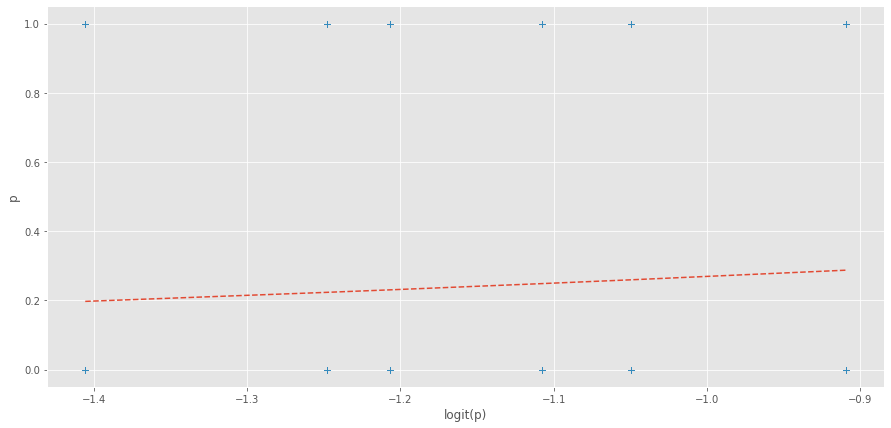

In [76]:
ldata = ldata.sort_values(by = ['p'], axis = 0)
plt.plot(logit(ldata.p), ldata.p, '--')
plt.plot(logit(ldata.p), ldata.DEFAULT, '+')
plt.xlabel('logit(p)')
plt.ylabel('p')
plt.show()

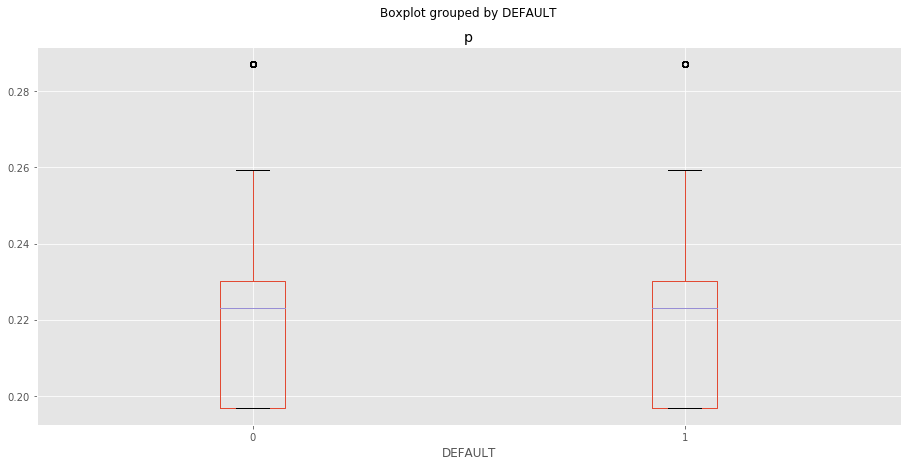

In [77]:
ldata.boxplot(column='p', by = 'DEFAULT')
plt.show()

In [78]:
ldata.loc[:, 'yhat'] = (ldata.p > 0.5) * 1
ldata.yhat.value_counts()

0    29601
Name: yhat, dtype: int64

In [79]:
pd.crosstab(ldata.DEFAULT, ldata.yhat)

yhat,0
DEFAULT,
0,22996
1,6605


In [80]:
# More straightforward way
m.pred_table()

array([[22996.,     0.],
       [ 6605.,     0.]])

## END Analysis by Priyanka

## START Analysis by Katya

To make predictions about whether a customer is likely to default - we'll train a number of different classifiers and see how well they perform. As usual, we start by splitting the data into train/test sets and rescaling.Splitting data into Train and Test Data sets for modelling purposes

#### Creating dummy variables for categorical variables

We will create dummy variables to apply the model. Due to we need to have characters values in the categorical variables, we will use the odata dataset that already has the categorical variables turned into categorical type (characters)

In [81]:
cat_vars=['EDUCATION_C','AGE_C','PAY_0C','PAY_2C','PAY_3C','PAY_4C','PAY_5C','PAY_6C']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(odata[var], prefix=var)
    data1=odata.join(cat_list)
    data=data1

cat_vars=['EDUCATION_C','AGE_C','PAY_0C','PAY_2C','PAY_3C','PAY_4C','PAY_5C','PAY_6C']
data_vars=odata.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

KeyError: 'PAY_0C'

In [ ]:
data_final=data[to_keep]
data_final.columns.values

In [ ]:
os_data_X = pd.DataFrame(odata=os_data_X,columns=columns )
os_data_y= pd.DataFrame(odata=os_data_y,columns=['y'])


data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

#### Implementing Logistic model

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

In [ ]:
x=ldata.loc[:,['LIMIT_BAL','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','EDUCATION','MARRIAGE','SEX','AGE','PAY_SUM']]
y=ldata.loc[:,['DEFAULT']]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

from sklearn.preprocessing import StandardScaler
scX = StandardScaler()
X_train = scX.fit_transform( X_train )
X_test = scX.transform( X_test )

# We'll need some metrics to evaluate our models
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression()
classifier1.fit( X_train, y_train )
y_pred = classifier1.predict( X_test )

cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for LogReg = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
scoresLR = cross_val_score( classifier1, X_train, y_train, cv=10)
print("Mean LogReg CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresLR.mean(), scoresLR.std() ))

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

## END Analysis by Katya

## 2. KNN Classifier